# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))
btc_price = float(btc_data['data']["1"]['quotes']["USD"]['price'])


# Fetch current ETH price 
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))
eth_price = float(eth_data['data']["1027"]['quotes']["USD"]['price'])


# Compute current value of my crypto
my_btc_value = btc_price * my_btc
print(my_btc_value)


my_eth_value = eth_price * my_eth
print(my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18711112,
            "total_supply": 18711112,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 47579.0,
                    "volume_24h": 64432088056,
                    "market_cap": 889511087932,
                    "percentage_change_1h": -0.0941881939498365,
                    "percentage_change_24h": -4.07272515610647,
                    "percentage_change_7d": -19.0443843167059,
                    "percent_change_1h": -0.0941881939498365,
                    "percent_change_24h": -4.07272515610647,
                    "percent_change_7d": -19.0443843167059
                },
                "CAD": {
                    "price": 57613.4111,
                    "volume_24h": 78020815427.0104,
               

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200

my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
my_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
my_portfolio

AGG                                       SPY  \
                            open    high     low    close   volume    open   
time                                                                         
2021-05-13 00:00:00-04:00  113.9  114.06  113.78  114.015  5446892  407.07   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-13 00:00:00-04:00  412.35  407.02  410.26  96561623

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(my_portfolio["AGG"]['close'])

spy_close_price = float(my_portfolio["SPY"]['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.015
Current SPY closing price: $410.26


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg

my_spy_value = spy_close_price * my_spy


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20513.00
The current value of your 200 AGG shares is $22803.00


### Savings Health Analysis

In [30]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_assets = my_btc_value + my_eth_value
shares_assets = my_spy_value + my_agg_value
d = {'amount': [crypto_assets, shares_assets]}
df_savings = pd.DataFrame(data=d)
df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,77220.649
shares,43316.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

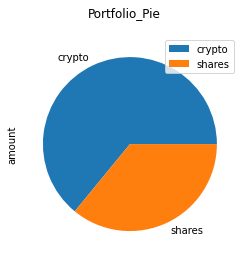

In [38]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title="Portfolio_Pie")

In [46]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_assets + shares_assets


# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have exceeded your emergency fund goal. Keep on investing.  :)")
elif total_savings < emergency_fund:
    print(f"You are on the right track. Only {emergency_fund - total_savings} away from the goal.")
    

Congrats! You have exceeded your emergency fund goal. Keep on investing.  :)


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [47]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-15', tz='America/New_York').isoformat()

In [56]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257  241.20   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245  241.55   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625  241.33   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554  241.84   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.470  2241270  241.96   

                                                             
                             high     low   close    volume  
time                                                         
2017-05-25 00:00:00-04:00  242.08  240.96  241.71  45278321  
2017-05-26 00:00:00-04:00  241.90  241.45  241.74  30002081  
2017-05-30 00:00:00-04:00  241.79  241.16  241.52  28437351  
2017-05-31 00:00:00-04:00  241.88  240.64  241.42  59140588  
2017-06-01 00:00:00-04:00  243.34  241.64  243.32  50837868

In [58]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [59]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.470  2241270   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-25 00:00:00-04:00          NaN  241.20  242.08  240.96  241.71   
2017-05-26 00:00:00-04:00     0.000183  241.55  241.90  241.45  241.74   
2017-05-30 00:00:00-04:00     0.001416  241.33  241.79  241.16  241.52   
2017-05-31 00:00:00-04:00     0.001049  241.84  241.88  240.64  241.42   
2017-06-01 00:00:00-04:00    -0.002551  241.96  243.34  241.64  243.32   

                                                  
                             volume daily_return  
time                                              
2017-05-25 00:00:00-04:00  45278321          NaN  
2017-05-26 00:00:00-04:00  30002081     0.000124  
2017-05-30 00:00:00-04:00  28437351    -0.000910  
2017-05-31 00:00:00-04:00  59140588    -0.000414  
2017-06-01 00:00:00-04:00  50837868     0.007870

In [60]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004236,1.000703,1.003277,0.996335,1.009364,1.001062,1.004393,1.021491,0.996754,1.013018,...,0.993561,1.001901,0.989277,0.992239,0.999964,0.994021,0.999113,1.005510,1.003926,0.994142
2,1.005800,0.981446,0.998846,0.991300,1.025751,0.996181,1.006983,1.020546,1.001870,1.009204,...,0.990805,1.007565,0.990332,0.993528,0.999580,1.005691,1.003042,1.011890,1.005432,1.006454
3,1.002010,0.978636,1.012757,1.001888,1.012590,1.000129,1.022980,1.024102,1.000551,0.996402,...,0.989682,1.017518,0.994662,0.993731,1.003897,0.999125,1.000655,0.997108,1.010277,1.006062
4,0.996173,0.974324,1.016065,1.005361,1.000145,0.998960,1.011732,1.009976,0.987628,0.993645,...,0.996133,1.018602,1.000062,0.984128,1.011922,1.002600,0.992726,0.991321,1.010862,1.024534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.530367,17.528355,12.888746,7.959371,26.130716,18.363494,18.893444,8.814487,5.520337,25.478540,...,19.123663,6.815152,3.633304,31.624414,33.479984,9.192251,14.915046,21.495553,18.174258,13.898574
7557,3.525211,17.635460,12.627680,7.932966,26.612728,18.380754,19.046227,8.874105,5.480688,25.154737,...,19.058829,6.888485,3.636295,31.435146,33.782155,9.301007,14.805365,21.550561,18.037480,14.006532
7558,3.528800,17.967189,12.404579,7.940776,26.503037,18.363995,19.238689,8.843552,5.443726,25.299337,...,18.914928,6.831381,3.648228,31.455480,33.678913,9.503192,14.809084,21.720122,17.984236,14.016596
7559,3.537422,18.041572,12.344006,7.945814,26.359401,18.621677,19.711591,8.907219,5.374213,25.222524,...,18.769371,6.871068,3.661955,31.370430,33.943383,9.462108,14.917555,21.944575,17.875680,14.047787


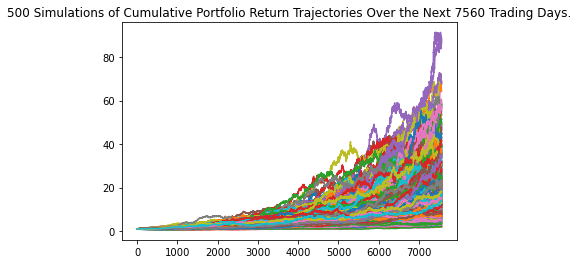

In [61]:
# Plot simulation outcomes
MC_30_year_line = MC_30_year.plot_simulation()

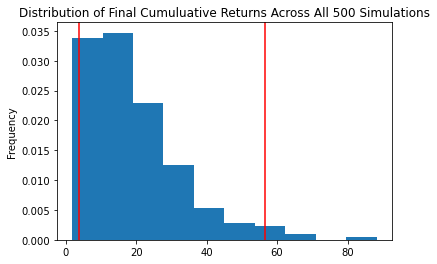

In [62]:
# Plot probability distribution and confidence intervals
MC_30_year_dist = MC_30_year.plot_distribution()

### Retirement Analysis

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
my_stats = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(my_stats)

count           500.000000
mean             19.453878
std              13.537855
min               1.801372
25%               9.336227
50%              15.928151
75%              25.268313
max              88.230985
95% CI Lower      3.740043
95% CI Upper     56.654786
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(my_stats[8]*20000,2)
ci_upper = round(my_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $74800.85 and $1133095.72


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [69]:
# Set initial investment
initial_investment_2 = 20000 * 1.5
print(initial_investment_2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30k = round(my_stats[8]*30000,2)
ci_upper_30k = round(my_stats[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30k} and ${ci_upper_30k}")

30000.0
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $112201.28 and $1699643.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [82]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002972,0.999224,0.980348,1.009471,0.991135,1.008960,1.010105,0.993953,1.006753,1.012907,...,0.975936,0.997324,0.999658,1.009561,1.008654,0.991752,1.007638,0.993940,1.013102,1.020498
2,1.026000,1.000884,0.972031,1.009560,1.002473,0.996846,0.986156,0.987108,1.028047,1.013662,...,0.987384,0.983662,0.986300,1.002013,0.988779,0.978556,1.033537,0.978006,1.002670,1.015199
3,1.019041,0.994229,0.971234,1.013053,1.012723,1.007834,0.996544,0.984109,1.040253,1.017345,...,1.000801,0.996372,0.969100,1.005654,0.992001,0.973050,1.039926,0.996374,0.999023,1.010689
4,1.006200,0.991213,0.971334,1.020694,1.013515,1.019377,1.005973,0.987621,1.047334,1.023010,...,1.009096,1.013724,0.980037,0.988220,0.984399,0.973902,1.044967,0.990620,0.993719,1.018649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.444295,2.150710,2.091534,1.685045,0.601276,2.052816,4.230495,1.932023,3.140996,1.381874,...,2.304456,2.262601,3.622542,2.212492,2.459336,1.544565,3.455362,0.903761,0.920649,3.194641
1257,2.482207,2.128176,2.044391,1.687657,0.594087,2.090087,4.249785,1.951910,3.155336,1.371523,...,2.312688,2.255041,3.680041,2.203673,2.459504,1.539564,3.451106,0.910989,0.922744,3.248561
1258,2.473046,2.123683,2.035568,1.678444,0.583642,2.083692,4.297455,1.948695,3.148388,1.352546,...,2.315611,2.213528,3.734265,2.201882,2.517075,1.532598,3.417339,0.924633,0.914777,3.197748
1259,2.485123,2.152734,2.053650,1.705817,0.587299,2.095110,4.343793,1.977751,3.143561,1.370951,...,2.357144,2.224543,3.688651,2.198578,2.491316,1.536516,3.426559,0.913320,0.924301,3.215258


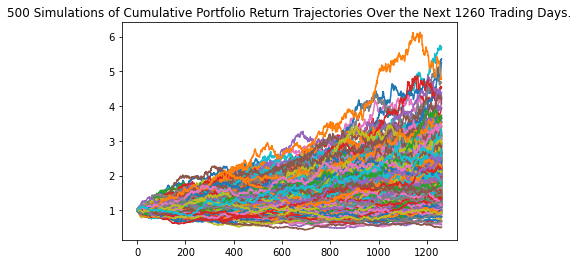

In [83]:
# Plot simulation outcomes
MC_5_year_line = MC_5_year.plot_simulation()

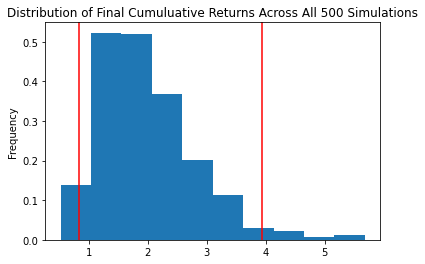

In [84]:
# Plot probability distribution and confidence intervals
MC_5_year_dist = MC_5_year.plot_distribution()

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
my_stats_2 = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(my_stats_2)

count           500.000000
mean              1.987870
std               0.807034
min               0.516670
25%               1.378995
50%               1.853322
75%               2.443707
max               5.682844
95% CI Lower      0.838195
95% CI Upper      3.944909
Name: 1260, dtype: float64


In [100]:
# Set initial investment
initial_investment_3 = 80000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $80,000
ci_lower_five = round(my_stats[8]*80000,2)
ci_upper_five = round(my_stats[9]*80000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 5 years will end within in the range of $299203.4 and $4532382.88


### Ten Years Retirement Option

In [89]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [90]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989705,0.995680,1.012188,0.991005,0.999680,1.013495,1.011083,0.987550,0.996809,1.002765,...,0.994768,1.007472,1.012872,1.011955,1.001519,0.990511,1.000663,0.995907,1.006475,1.011009
2,0.988214,1.018757,1.008677,0.980949,1.003142,1.020456,1.000534,1.008938,0.986096,1.007937,...,1.006018,1.004844,1.011139,1.024144,1.002658,0.999254,0.997809,0.997035,1.017766,1.007800
3,0.996434,1.014995,1.018307,0.992775,0.997216,1.038436,1.002946,1.013754,0.995039,1.001119,...,1.025690,0.992172,1.014390,1.018181,1.019872,1.014417,0.994991,0.983688,1.031385,1.010567
4,0.997481,0.994463,1.021919,0.979596,1.009231,1.050868,0.998516,1.014652,0.995249,1.007380,...,1.023263,0.987331,1.012738,1.029152,1.020345,1.016914,0.999994,0.976670,1.029231,1.032945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.509677,6.609388,2.852202,2.693830,3.118726,2.082180,2.157564,3.731084,3.166127,2.461834,...,2.045341,4.938122,1.783511,6.475087,2.987985,3.281397,2.867140,1.406366,2.761597,3.948528
2517,5.461475,6.691357,2.796744,2.672716,3.097821,2.051244,2.213337,3.867382,3.148317,2.467941,...,2.003843,4.918929,1.788249,6.383554,3.010414,3.281179,2.851335,1.427989,2.738240,3.942966
2518,5.429398,6.818310,2.764105,2.658468,3.020112,2.041263,2.194789,3.881450,3.166955,2.488906,...,2.019508,4.955454,1.808950,6.425025,3.011792,3.223692,2.849548,1.429519,2.743925,3.971149
2519,5.467752,6.840562,2.790586,2.685432,2.987102,2.029363,2.187061,3.922798,3.200226,2.465555,...,2.028840,4.802692,1.807680,6.472109,3.041403,3.248941,2.863720,1.427987,2.712411,3.957111


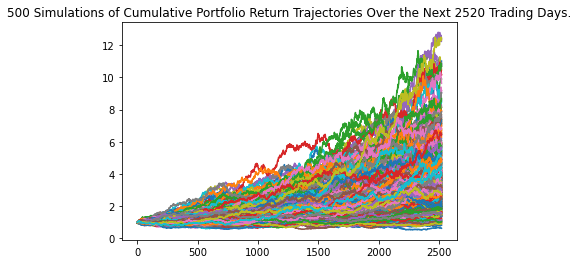

In [91]:
# Plot simulation outcomes
MC_10_year_line = MC_10_year.plot_simulation()

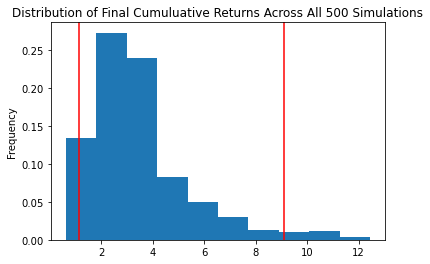

In [95]:
# Plot probability distribution and confidence intervals
MC_10_year_dist = MC_10_year.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
my_stats_3 = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(my_stats_3)

count           500.000000
mean              3.515537
std               1.959923
min               0.628802
25%               2.208433
50%               3.051578
75%               4.075540
max              12.445281
95% CI Lower      1.122555
95% CI Upper      9.110216
Name: 2520, dtype: float64


In [101]:
# Set initial investment
initial_investment_4 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(my_stats[8]*60000,2)
ci_upper_ten = round(my_stats[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $224402.55 and $3399287.16
